In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

os.chdir("C:\\Users\\Gebruiker\\Desktop\\Rotzooi begint hier\\uvt\\healthlynx")

data = pd.read_csv('verzekering.csv', delimiter = ';')

In [8]:
data.head()

,Geslacht,Leeftijd,Gestandaardiseerd inkomen,Zorgvorm Zvw-zorgkosten,Perioden,Gemiddelde zorgkosten volgens de Zvw (euro)
0,Totaal mannen en vrouwen,"Totaal, gestandaardiseerd",Totaal alle inkomens,Totaal alle zorgvormen,2009,2032
1,Totaal mannen en vrouwen,"Totaal, gestandaardiseerd",Totaal alle inkomens,Totaal alle zorgvormen,2010,2099
2,Totaal mannen en vrouwen,"Totaal, gestandaardiseerd",Totaal alle inkomens,Totaal alle zorgvormen,2011,2115
3,Totaal mannen en vrouwen,"Totaal, gestandaardiseerd",Totaal alle inkomens,Totaal alle zorgvormen,2012,2078
4,Totaal mannen en vrouwen,"Totaal, gestandaardiseerd",Totaal alle inkomens,Totaal alle zorgvormen,2013,2186


In [39]:
y = data['Gemiddelde zorgkosten volgens de Zvw (euro)'][:11]
X = data['Perioden'][:11]

year2019 = []
for i in range(len(data['Perioden'])):
    if data['Perioden'][i] == '2019*':
        year2019.append(data['Gemiddelde zorgkosten volgens de Zvw (euro)'][i])
        
        print('yes')

print(year2019)

yes
yes
yes
yes
yes
yes
yes
yes
[2625, 3118, 3537, 2975, 2685, 2512, 2402, 2333]


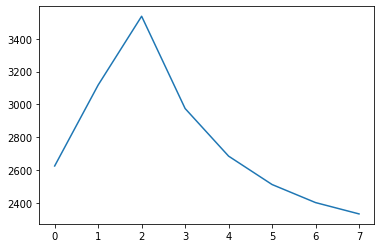

In [40]:
plt.plot(year2019)


In [144]:
incomes = pd.read_csv('incomes.csv', delimiter = ';')
incomes.head()
full = pd.read_csv('lookup.csv', delimiter = ',')
full.head(10)

,Unnamed: 0,Age,Neighbourhood,Scale,Good_Health,Sufficient_Exercise,Severe_Obesity,Smoking,Low_Alcohol,Illness,Disability,Anxiety_Depression,High_Stress,Severe_Loneliness,Caretaker,Volunteer_Worker
0,1,18 jaar of ouder,Nederland,Land,78.4,49.9,15.6,17.9,43.9,32.5,15.2,6.7,17.9,11.2,13.6,24.6
1,2,18 jaar of ouder,'s-Hertogenbosch,Gemeente,78.0,48.1,15.4,18.4,38.8,32.1,15.2,7.4,18.6,11.2,13.5,22.9
2,3,18 jaar of ouder,Binnenstad,Wijk,80.3,54.8,11.4,22.2,27.8,30.0,12.7,8.4,22.1,12.2,11.3,22.4
3,4,18 jaar of ouder,Binnenstad-Centrum,Buurt,82.5,56.5,10.5,21.5,25.0,28.1,10.6,7.6,22.0,11.3,11.1,22.3
4,5,18 jaar of ouder,Binnenstad-Oost,Buurt,79.4,55.3,10.8,20.9,27.7,31.6,14.0,8.0,20.7,11.6,12.6,24.1
5,6,18 jaar of ouder,De Hofstad,Buurt,77.9,56.1,13.4,25.5,32.4,30.9,15.2,10.4,24.6,13.7,9.9,20.0
6,7,18 jaar of ouder,Binnenstad-Noord,Buurt,69.4,46.6,15.2,23.9,39.2,40.4,24.3,9.9,19.6,16.3,12.7,21.6
7,8,18 jaar of ouder,Het Zand,Buurt,79.9,52.4,12.1,24.4,28.9,30.0,12.6,9.9,24.4,13.7,10.3,21.5
8,9,18 jaar of ouder,Vughterpoort,Buurt,87.4,56.6,8.2,7.6,28.0,25.4,7.6,2.5,12.7,5.5,17.0,33.8
9,10,18 jaar of ouder,Zuidoost,Wijk,74.3,47.9,16.0,19.4,40.3,35.1,18.6,8.4,19.0,12.6,13.1,21.3


In [233]:
base_life_expectancy = 82.01 #cbs middelbare scholing


# Constants
cSmoke = 9 #interval -5 moderate smokers -9 years heavy smokers -12 years (cbs.nl)
cObese = 10 #severe obesity -10 years (ox.ac.uk)
cAlco = 1 #moderation alcohol +1 year (nature.com)
cAlcolow = 7 #more than recommended drinkers -7 years
cStress = 2.8 #high stress -2.8 years (sciencedaily.com)
cLonely = 15 #loneliness -15 years (scientificamerican.com)
cExercise = 4.5 #exercise ~+4.5 years (reimers, 2012)
bias = 8.4

# Influential factors (% of population)

mSmoke = 2
mObese = 2
mAlcolow = 2
mStress = 2
mLonely = 2
mExercise = 2



class Neighbourhood:
    def __init__(self,name, health,  exercise, obesity, smoking, 
                lowalco, illness,  disability, anxiety, stress, lonely):
        
        self.name = name
        self.obesity = obesity
        self.smoking = smoking
        self.lowalco = lowalco
        self.diability = disability
        self.anxiety = anxiety
        self.stress = stress
        self.lonely = lonely
        self.exercise = exercise
        
        
    def calculate_life(self):
        
        smoke = 0.01*(self.smoking+mSmoke)*cSmoke
        obese = 0.01*(self.obesity+mObese)*cObese
        hialco = abs(0.01*(1-self.lowalco-mAlcolow)*cAlcolow) 
        stress = 0.01*(self.stress+mStress)*cStress
        lonely = 0.01*(self.lonely+mLonely)*cLonely
        exercise = 0.01*(self.exercise+mExercise)*cExercise
        
        life_expectancy = base_life_expectancy + smoke + obese + hialco + stress + lonely - bias
        
        
        return life_expectancy
    
    def __repr__(self):
        return "Neighbourhood: {}, Life expectancy: {}".format(self.name, self.calculate_life())
    
hoods = []
    
for i in range(len(full['Age'])):
     hoods.append(Neighbourhood(full['Neighbourhood'][i],full['Good_Health'][i], full['Sufficient_Exercise'][i],
                               full['Severe_Obesity'][i],full['Smoking'][i],full['Low_Alcohol'][i],full['Illness'][i],
                               full['Disability'][i],full['Anxiety_Depression'][i],full['High_Stress'][i],
                                full['Severe_Loneliness'][i]))
    
h = []
expectancies = []


print(hoods[0].calculate_life())
for i in range(len(hoods)):
    h.append(hoods[i].name)
    expectancies.append(hoods[i].calculate_life())




baseline = hoods[0].calculate_life()
def normalize(n):
    return ((n-baseline)/baseline)*100

expectancies = np.array(expectancies)
exp_norm = normalize(expectancies)
#print(exp_norm)

df = pd.DataFrame({'Neighbourhood':h, 'Life_expectancy': exp_norm})
df.head(10)


#df.to_csv('Life_expectancies_model.csv')

82.8412


,Neighbourhood,Life_expectancy
0,Nederland,0.000000
1,'s-Hertogenbosch,-0.377107
2,Binnenstad,-1.077242
3,Binnenstad-Centrum,-1.664872
4,Binnenstad-Oost,-1.455315
5,De Hofstad,0.267500
6,Binnenstad-Noord,1.187332
7,Het Zand,-0.311439
8,Vughterpoort,-4.563671
9,Zuidoost,0.197728


In [235]:
old = 81.9652
new = 82.8412

print(((new-old)/old)*100)
new-old

1.0687462484078667


0.8760000000000048

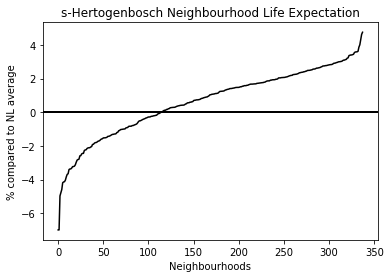

In [245]:
import matplotlib.collections as collections

base = pd.read_csv('Life_expectancies.csv')


base_sort = np.array(sorted(list(base['Life_expectancy'])))


t = np.arange(0,338)


#baseline

#Life expectancy = 82.01

plt.title('s-Hertogenbosch Neighbourhood Life Expectation')

plt.ylabel('% compared to NL average')
plt.xlabel('Neighbourhoods')
plt.plot(t, base_sort, color='black')
plt.axhline(0, color='black', lw=2)


collection = collections.BrokenBarHCollection.span_where(
    t, ymin=0, ymax=5, where=base_sort > 0, facecolor='green', alpha=0.5)
ax.add_collection(collection)

collection = collections.BrokenBarHCollection.span_where(
    t, ymin=-7, ymax=0, where=base_sort < 0, facecolor='red', alpha=0.5)
ax.add_collection(collection)


plt.show()

In [246]:
print(df['Life_expectancy'].sort_values())



125   -4.690661
8     -4.563671
242   -4.274443
180   -3.954554
63    -3.819597
331   -3.573343
154   -3.545337
164   -3.536405
291   -3.533025
37    -3.498259
150   -3.398550
269   -3.376339
326   -3.359440
47    -3.357991
148   -3.339160
153   -3.323950
172   -3.188993
233   -3.169679
228   -3.100148
33    -3.085180
204   -3.057899
102   -3.054760
231   -3.027238
219   -2.985471
36    -2.978711
222   -2.964467
181   -2.961811
163   -2.947809
64    -2.922217
149   -2.911595
         ...   
95     2.236327
211    2.408705
184    2.410636
212    2.441539
315    2.544628
248    2.554767
190    2.752737
294    2.767705
298    2.801987
73     2.926805
70     3.078661
66     3.159056
249    3.180060
187    3.184406
299    3.268181
183    3.318639
246    3.322743
65     3.356784
13     3.604245
130    3.639252
72     3.783866
17     3.975558
182    4.070438
189    4.082993
301    4.131036
71     4.526975
134    4.709010
188    4.901426
166    6.894396
49     6.894396
Name: Life_expectancy, L